In [1]:
# import libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

# connect to Website


<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
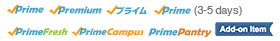

In [81]:
url = 'https://www.amazon.com/Bradley-Ladies-Womens-Sleeve-Swimwear/dp/B017T8XHVE/ref=sr_1_18_sspa?c=ts&keywords=Women%27s+Novelty+Tops+%26+Tees&qid=1660804959&s=apparel&sr=1-18-spons&ts_id=9056922011&psc=1&smid=A3RJL7M0XGPITC'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url,headers=headers)

soup1 = BeautifulSoup(page.content,'html.parser')

soup2 = BeautifulSoup(soup1.prettify(),'html.parser')

print(soup2)

In [82]:
title = soup2.find(id='productTitle').get_text()
#title
price = soup2.find(id='corePriceDisplay_desktop_feature_div').get_text()

In [91]:
title = title.strip()
price = soup2.find(id='corePriceDisplay_desktop_feature_div').get_text()
price = price.strip()
price = price[price.find('$')+1:price.find('$')+price.find('\n')+1].strip()

In [92]:
print(title)
print(price)

Bradley Ladies Rash Guard Women's Long Sleeve Swim Shirt Surf Swimwear SPF Sun
16.95


# export CSV file

In [101]:
today = datetime.date.today()

In [109]:
import csv

header = ['Title', 'Price', 'Date']
data = [title, price, today]

with open('AmazonWebScraperDataset.csv','w',newline='',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [103]:

import pandas as pd


In [110]:
with open('AmazonWebScraperDataset.csv','a+',newline='',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [116]:
def check_price():
    url = 'https://www.amazon.com/Bradley-Ladies-Womens-Sleeve-Swimwear/dp/B017T8XHVE/ref=sr_1_18_sspa?c=ts&keywords=Women%27s+Novelty+Tops+%26+Tees&qid=1660804959&s=apparel&sr=1-18-spons&ts_id=9056922011&psc=1&smid=A3RJL7M0XGPITC'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url,headers=headers)

    soup1 = BeautifulSoup(page.content,'html.parser')

    soup2 = BeautifulSoup(soup1.prettify(),'html.parser')   

    title = soup2.find(id='productTitle').get_text()

    price = soup2.find(id='corePriceDisplay_desktop_feature_div').get_text()

    title = title.strip()

    price = soup2.find(id='corePriceDisplay_desktop_feature_div').get_text()
    
    price = price.strip()
    
    price = price[price.find('$')+1:price.find('$')+price.find('\n')+1].strip()

    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
 

In [ ]:
while(True):
    check_price()
    time.sleep(2)

In [120]:
df = pd.read_csv('AmazonWebScraperDataset.csv')
df.head()

,Title,Price,Date
0,Bradley Ladies Rash Guard Women's Long Sleeve ...,16.95,2022-08-18
1,Bradley Ladies Rash Guard Women's Long Sleeve ...,16.95,2022-08-18
2,Bradley Ladies Rash Guard Women's Long Sleeve ...,16.95,2022-08-18
3,Bradley Ladies Rash Guard Women's Long Sleeve ...,16.95,2022-08-18
4,Bradley Ladies Rash Guard Women's Long Sleeve ...,16.95,2022-08-18
